### Project Scenario

You're preparing to trek a forest soon.

You enjoy mushrooms a lot, and anticipate them appearing during your trek. The problem with mushrooms is that while many are edible, there are those among them that are highly poisonous.

Luckily for you, you remember that there's a field guide containing mushroom information, but you'd prefer to train a model to tell you whether the mushroom is poisonous.

### What we'll be doing:
In this project, we will do the following:

1. Download mushroom field guide data and clean the data up (Part I)
2. Perform exploratory data analysis (Part II)
3. Apply machine learning techniques to train a model to predict mushroom edibility (Part III)
4. Visualize a decision tree

### Dataset
We'll be getting our data from the <a href='https://archive.ics.uci.edu/ml/datasets/Mushroom'>UCI Machine Learning Repository</a>. 

More specifically, the data is submitted by the Audobon Society Field Guide, a nature reference. 

Download the data <a href = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/'>here</a>. We will need only two files:
1. agarious-lepiota.data
2. agarious-lepiota.names

### Inspecting the data definitions

From `agarious-lepiota.data` we first learn that the columns in the dataset are as below:
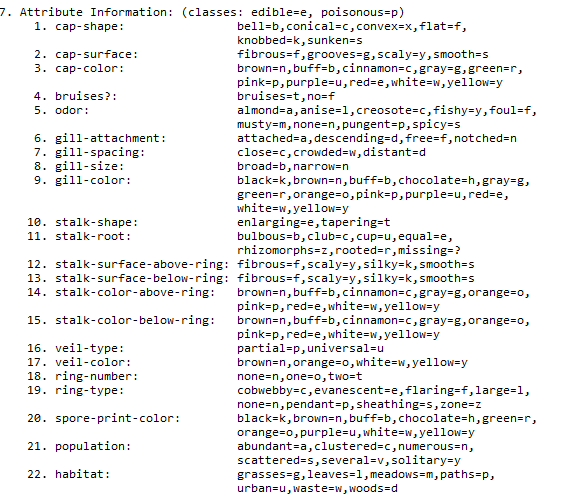

With that in mind, we can now proceed to import and clean our dataset.

### Step 1: Import pandas as pd
First up, import pandas as pd to work with the tabular data.

In [3]:
# Step 1: Import pandas
import pandas as pd

### Step 2: Read agaricus-lepiota.data into a DataFrame
Treat agaricus-lepiota.data like a CSV, and read it into a DataFrame.

The data does not have any column information, so we will put None in our <strong>header</strong> parameter.

Sanity check:
1. 8,124 rows
2. 23 columns

In [4]:
# Step 2: Read agaricus-lepiota.data 

df = pd.read_csv('agaricus-lepiota.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Step 3: Renaming our columns
As mentioned, the data does not have any column names, so we will give it one.

In [8]:
# Step 3: Give our DataFrame column names
# create a variable to store column names in order from agaricus-lepiota.names
column_names = """1. class
2. cap_shape
3. cap_surface
4. cap_color
5. isBruised
6. odor
7. gill_attachment
8. gill_spacing
9. gill_size
10. gill_color
11. stalk_shape
12. stalk_root
13. stalk_surface_above_ring
14. stalk_surface_below_ring
15. stalk_color_above_ring
16. stalk_color_below_ring
17. veil_type
18. veil_color
19. ring_number
20. ring_type
21. spore_print_color
22. population
23. habitat
"""

# split the strings at every ".  "
column_names = column_names.split('. ')

# remove the standalone "1"
column_names.remove('1')

# create a list to store cleaned column names
column_names_cleaned = []

# loop through each name in column_names to remove extra characters and store in column_names_cleaned
for name in column_names:
    column_names_cleaned.append(name.replace('\n', ' '))
    
# remove the remaining numbers
column_names_cleaned = map(lambda x: x[:x.find(' ')], column_names_cleaned)

# check that we have 23 column names
use_column_names = list(column_names_cleaned)
len(use_column_names)

23

In [9]:
# set use_column_names to our df
df.columns = use_column_names
df

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 4: Export cleaned DataFrame into a CSV
There we have it - we have given our dataset proper column names. 

Let's export this into a CSV for subsequent analysis in Parts II and III. 

In [ ]:
# Step 4: Export cleaned DataFrame into a CSV

df.to_csv('Mushroom_DF.csv')